# Data Visualization after Preprocessing

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import networkx as nx
import geopandas as gpd
import folium

from textblob import TextBlob
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk import pos_tag
from termcolor import colored
from collections import Counter
from collections import defaultdict

In [ ]:
df = pd.read_csv("data/processed_data.csv")
df.shape

,Title,Full_Article,Text_Length,Repetition_Ratio,Title_Tokens,Full_Article_Tokens,Stemming_Title,Stemming_Full_Article,Lemmatized_Title,Lemmatized_Full_Article,Lemmatized_Full_Article_String
0,liz truss will approve more oil drilling if sh...,tory leadership candidate criticised by campai...,430,0.046512,"['liz', 'truss', 'approve', 'oil', 'drilling',...","['tory', 'leadership', 'candidate', 'criticise...","['liz', 'truss', 'approv', 'oil', 'drill', 'be...","['tori', 'leadership', 'candid', 'criticis', '...","['liz', 'truss', 'approve', 'oil', 'drill', 'b...","['tory', 'leadership', 'candidate', 'criticise...",tory leadership candidate criticise campaigner...
1,renewed highland golf course plan has environm...,scottish government rejected a new links at co...,1137,0.058047,"['renewed', 'highland', 'golf', 'course', 'pla...","['scottish', 'government', 'rejected', 'new', ...","['renew', 'highland', 'golf', 'cours', 'plan',...","['scottish', 'govern', 'reject', 'new', 'link'...","['renew', 'highland', 'golf', 'course', 'plan'...","['scottish', 'government', 'reject', 'new', 'l...",scottish government reject new link coul prote...
2,visiting green spaces deters mental health dru...,positive effects were stronger among those rep...,583,0.042882,"['visiting', 'green', 'spaces', 'deters', 'men...","['positive', 'effects', 'stronger', 'among', '...","['visit', 'green', 'space', 'deter', 'mental',...","['posit', 'effect', 'stronger', 'among', 'repo...","['visit', 'green', 'space', 'deter', 'mental',...","['positive', 'effect', 'stronger', 'among', 'r...",positive effect stronger among report lowest a...
3,bought too much red cabbage turn it into a fes...,this fantastic vegan centrepiece makes full us...,528,0.049242,"['bought', 'much', 'red', 'cabbage', 'turn', '...","['fantastic', 'vegan', 'centrepiece', 'makes',...","['bought', 'much', 'red', 'cabbag', 'turn', 'f...","['fantast', 'vegan', 'centrepiec', 'make', 'fu...","['buy', 'much', 'red', 'cabbage', 'turn', 'fes...","['fantastic', 'vegan', 'centrepiece', 'make', ...",fantastic vegan centrepiece make full use oute...
4,this year has been very good readers uk butter...,readers share their favourite sightings over t...,931,0.037594,"['year', 'good', 'readers', 'uk', 'butterfly',...","['readers', 'share', 'favourite', 'sightings',...","['year', 'good', 'reader', 'uk', 'butterfli', ...","['reader', 'share', 'favourit', 'sight', 'summ...","['year', 'good', 'readers', 'uk', 'butterfly',...","['readers', 'share', 'favourite', 'sightings',...",readers share favourite sightings summer news ...


In [4]:
# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=100, stop_words="english")
X_tfidf = tfidf.fit_transform(df["Full_Article"].dropna().astype(str))

Distribution of Text Length

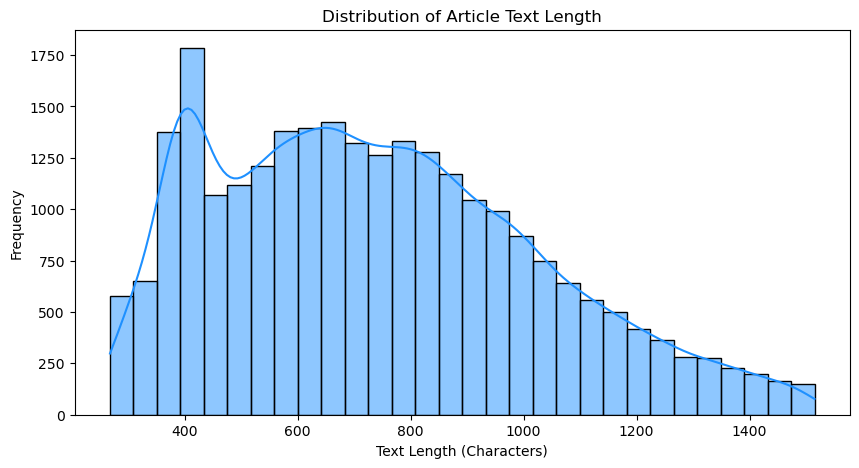

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df["Text_Length"], bins=30, kde=True, color="dodgerblue")
plt.title("Distribution of Article Text Length")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.show()

Repetition Ratio vs Text Length

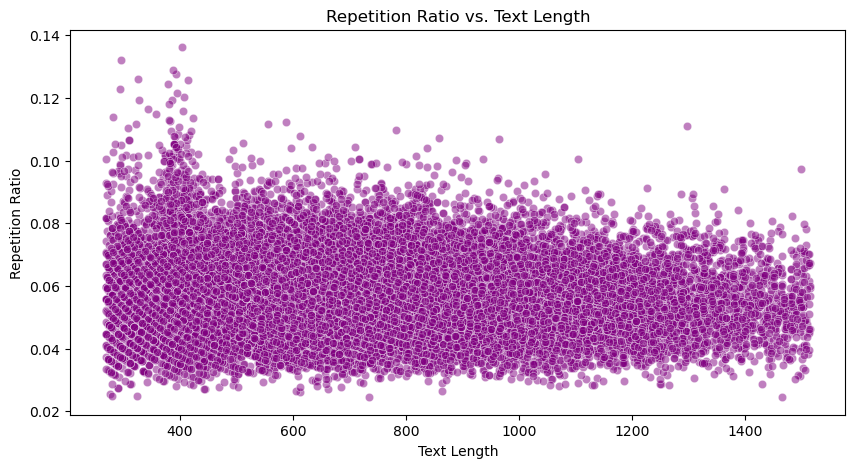

In [6]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Text_Length"], y=df["Repetition_Ratio"], alpha=0.5, color="purple")
plt.title("Repetition Ratio vs. Text Length")
plt.xlabel("Text Length")
plt.ylabel("Repetition Ratio")
plt.show()

Keyword Extraction using TF-IDF

In [7]:
# Get top keywords
feature_names = tfidf.get_feature_names_out()
tfidf_scores = np.asarray(X_tfidf.mean(axis=0)).flatten()
tfidf_df = pd.DataFrame({"Word": feature_names, "TF-IDF Score": tfidf_scores}).sort_values(by="TF-IDF Score", ascending=False).head(20)


C:\Users\User\AppData\Local\Temp\ipykernel_27176\4261457123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TF-IDF Score", y="Word", data=tfidf_df, palette="coolwarm")


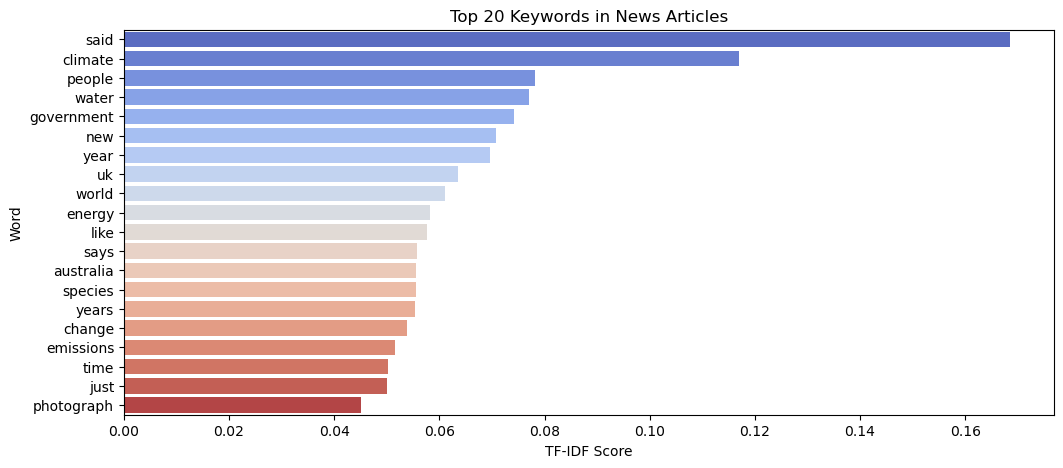

In [8]:
# Plot Top Keywords
plt.figure(figsize=(12,5))
sns.barplot(x="TF-IDF Score", y="Word", data=tfidf_df, palette="coolwarm")
plt.title("Top 20 Keywords in News Articles")
plt.show()

Topic Modeling with LDA

In [9]:
# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)


# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    print(", ".join([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    print("\n")

Topic 1:
year, people, land, food, environmental, environment, uk, government, plastic, said


Topic 2:
south, company, state, news, government, australian, email, australia, said, water


Topic 3:
fossil, government, change, oil, gas, carbon, said, emissions, energy, climate


Topic 4:
nature, year, research, years, scientists, study, wildlife, sea, said, species


Topic 5:
water, said, year, time, just, photograph, says, air, people, like




Visualize Word Embeddings (PCA)

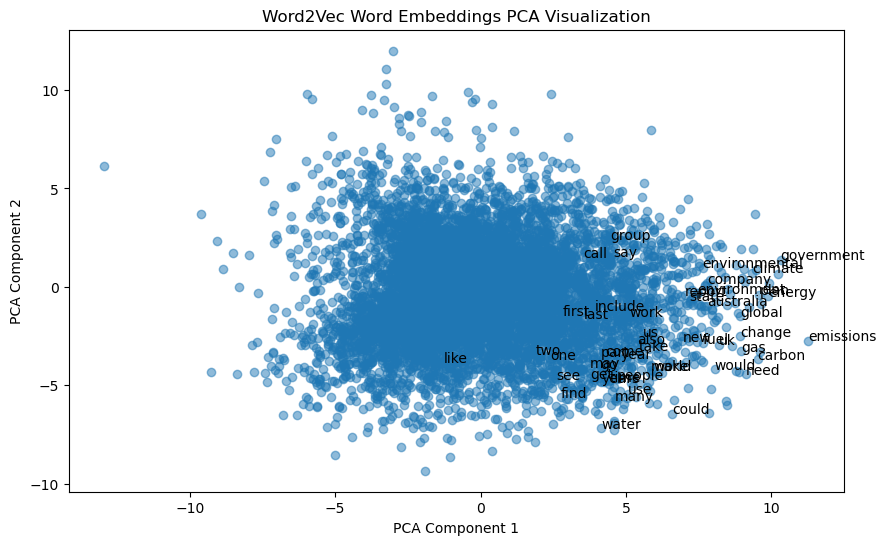

In [10]:
# Load the saved Word2Vec model
model = Word2Vec.load("word2vec_model.model")

# Get words and vectors
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Apply PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Plot words in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o', alpha=0.5)

# Annotate words
for i, word in enumerate(words[:50]):  # Limit to 50 words for clarity
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title("Word2Vec Word Embeddings PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Heapmap of Word Similarity

In [11]:
# Create an example text
example_text = ["climate", "pollution", "energy", "environment", "carbon"]

expanded_words = set(example_text) 

for word in example_text:
    if word in model.wv:
        similar_words = [sim[0] for sim in model.wv.most_similar(word, topn=3)]
        expanded_words.update(similar_words)  

words = sorted(expanded_words) 

# Create similarity matrix
similarity_matrix = np.zeros((len(words), len(words)))

for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        if word1 in model.wv and word2 in model.wv:
            similarity_matrix[i, j] = model.wv.similarity(word1, word2)

df_sim = pd.DataFrame(similarity_matrix, index=words, columns=words)

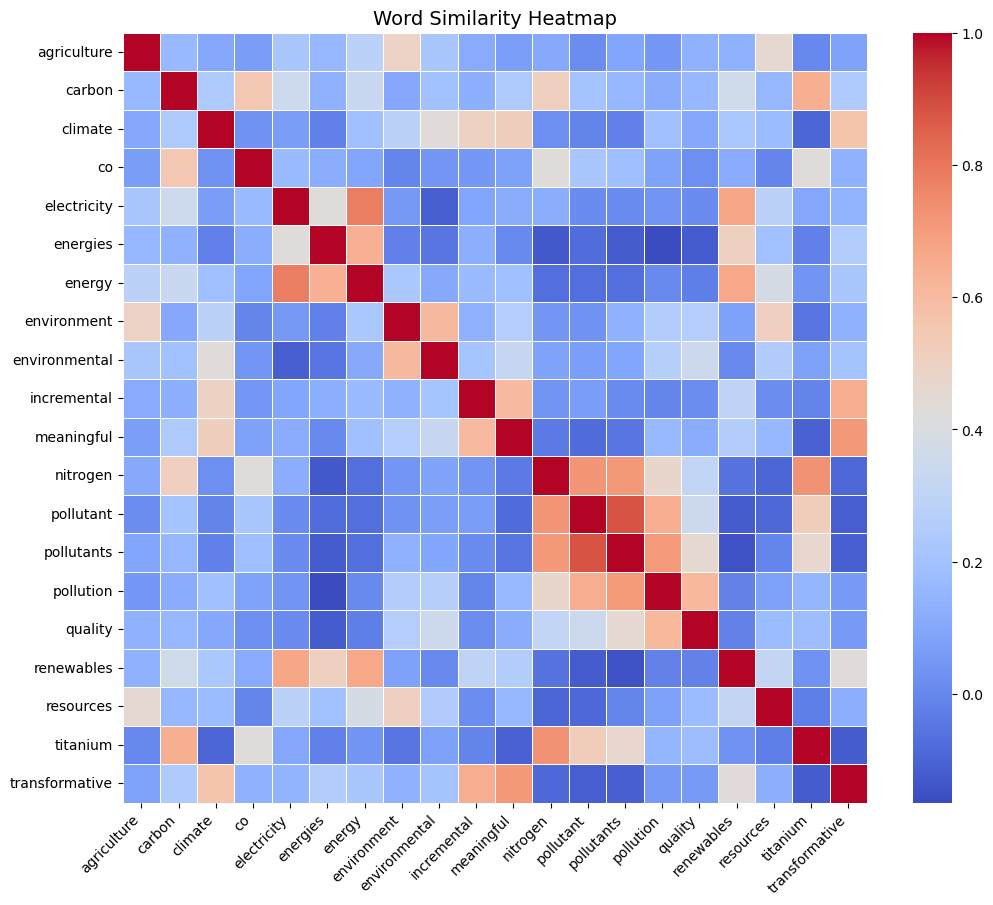

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_sim, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Word Similarity Heatmap", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Distribution of Unique Words in Each Article

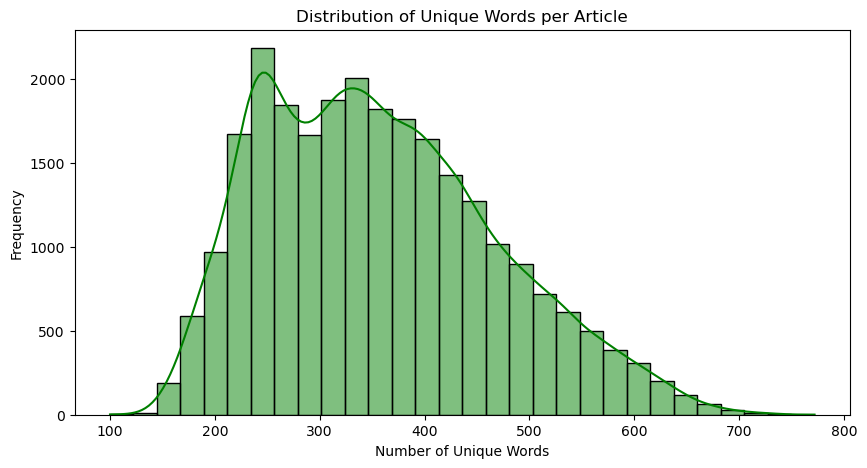

In [13]:
df["Unique_Words"] = df["Full_Article"].apply(lambda x: len(set(x.split())))

plt.figure(figsize=(10,5))
sns.histplot(df["Unique_Words"], bins=30, kde=True, color="green")
plt.title("Distribution of Unique Words per Article")
plt.xlabel("Number of Unique Words")
plt.ylabel("Frequency")
plt.show()

Topic Clustering Using PCA

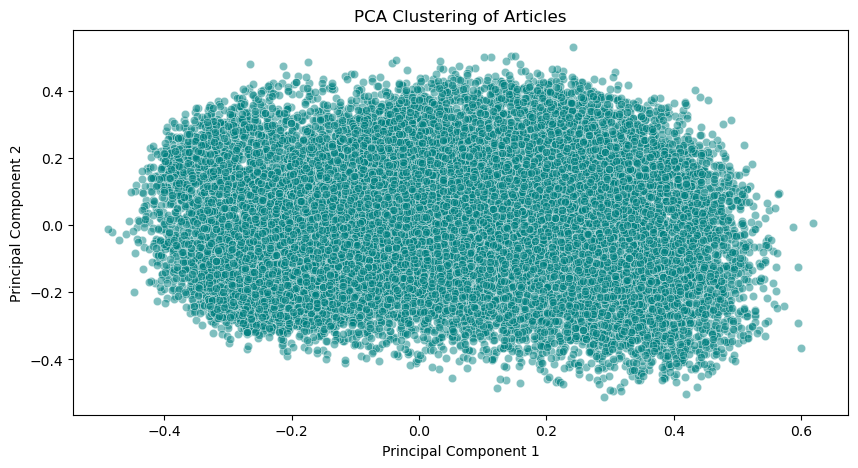

In [14]:
tfidf = TfidfVectorizer(max_features=100)
X_tfidf = tfidf.fit_transform(df["Lemmatized_Full_Article"])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.5, color="teal")
plt.title("PCA Clustering of Articles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Box Plot of Title Lengths

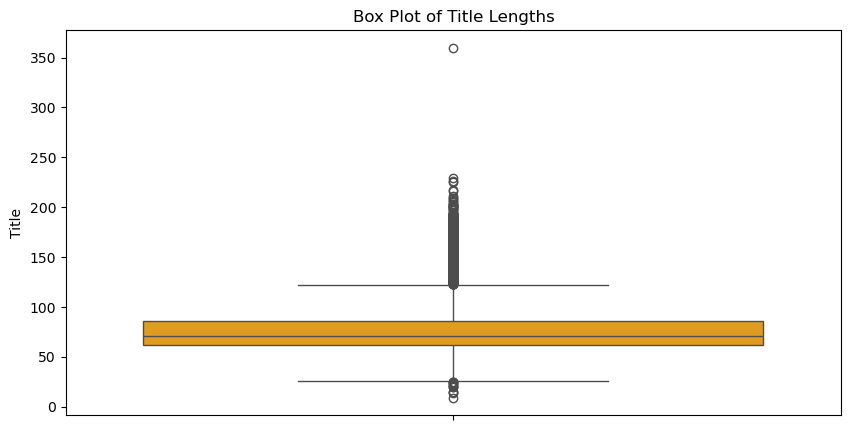

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Title"].apply(len), color="orange")
plt.title("Box Plot of Title Lengths")
plt.show()

Count of Stopwords in Titles

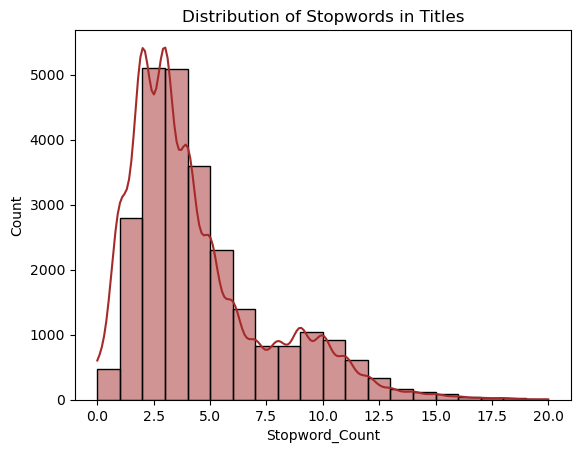

In [16]:

stop_words = set(stopwords.words("english"))
df["Stopword_Count"] = df["Title"].apply(lambda x: len([word for word in x.split() if word in stop_words]))

sns.histplot(df["Stopword_Count"], bins=20, kde=True, color="brown")
plt.title("Distribution of Stopwords in Titles")
plt.show()

POS Tags in Colored Form

In [17]:
POS_COLORS = {
    "NOUN": "blue",
    "VERB": "green",
    "ADJ": "magenta",
    "ADV": "cyan",
    "PRON": "yellow",
    "PROPN": "red",
    "NUM": "light_blue",
    "DET": "white",
}

nlp = spacy.load("en_core_web_sm")

def colorize_pos(text):
    doc = nlp(text) 
    colored_text = []

    for token in doc:
        pos_color = POS_COLORS.get(token.pos_, "white")
        colored_text.append(colored(token.text, pos_color)) 

    return " ".join(colored_text)

In [18]:
df["Colored_POS_Title"] = df["Title"].apply(colorize_pos)
df["Colored_POS_Article"] = df["Full_Article"].apply(colorize_pos)

# Print an example
print(df["Colored_POS_Title"].iloc[0])

liz truss will approve more oil drilling if she becomes pm


Sentence Complexity Analysis

In [19]:
df["Sentence_Count"] = df["Full_Article"].apply(lambda x: len(nltk.sent_tokenize(x)))
df["Words_per_Sentence"] = df["Text_Length"] / (df["Sentence_Count"] + 1) 

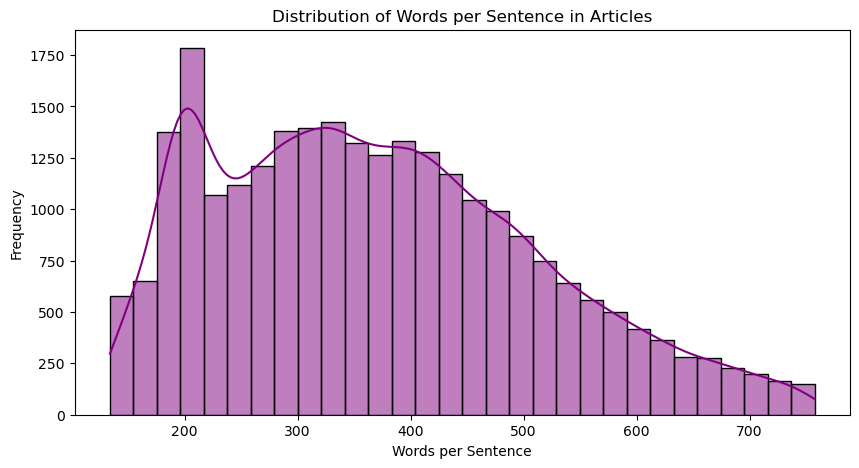

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df["Words_per_Sentence"], bins=30, kde=True, color="purple")
plt.title("Distribution of Words per Sentence in Articles")
plt.xlabel("Words per Sentence")
plt.ylabel("Frequency")
plt.show()

TF-IDF Topic Extraction

C:\Users\User\AppData\Local\Temp\ipykernel_27176\2765387819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_scores.values, y=tfidf_scores.index, palette="cool")


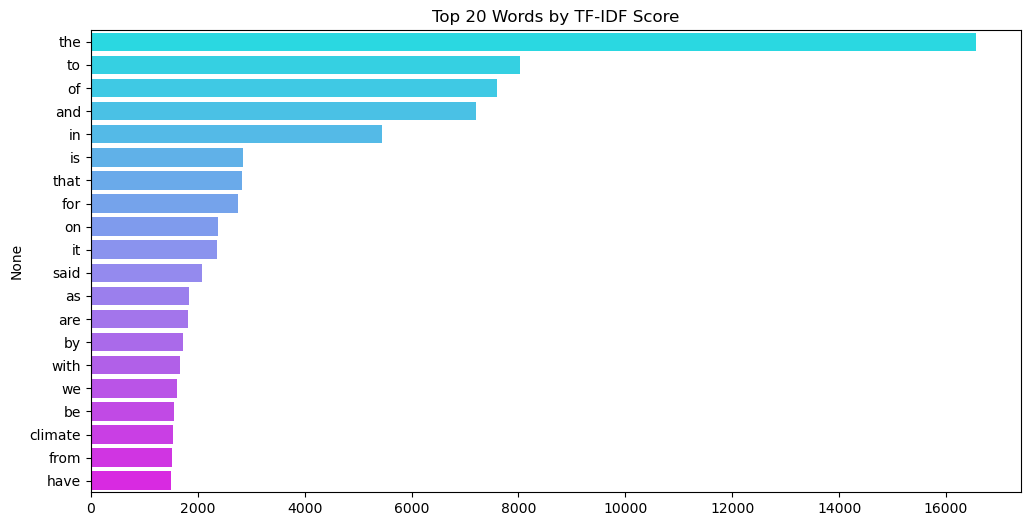

In [21]:
tfidf = TfidfVectorizer(max_features=50)
X_tfidf = tfidf.fit_transform(df["Full_Article"])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Summing TF-IDF scores
tfidf_scores = tfidf_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=tfidf_scores.values, y=tfidf_scores.index, palette="cool")
plt.title("Top 20 Words by TF-IDF Score")
plt.show()

Relationship Between Title & Article Sentiment

In [22]:
df["Title_Sentiment"] = df["Title"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Article_Sentiment"] = df["Full_Article"].apply(lambda x: TextBlob(x).sentiment.polarity)

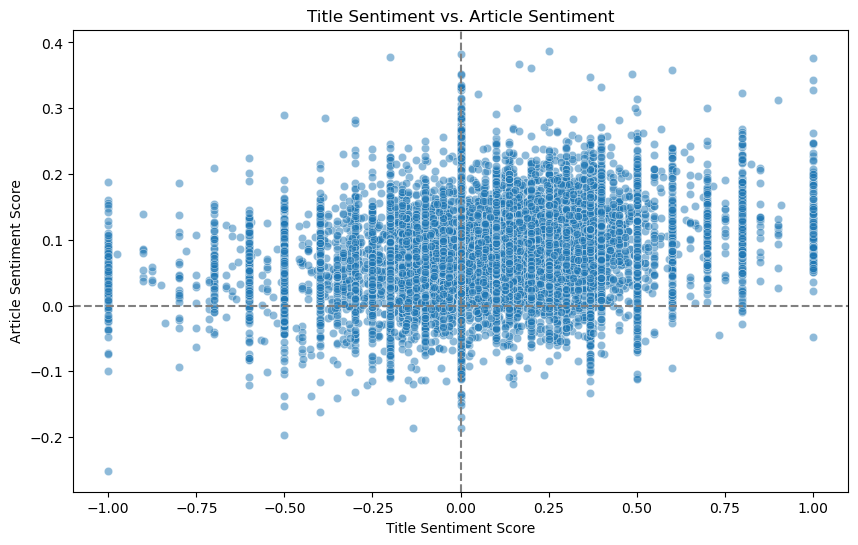

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Title_Sentiment"], y=df["Article_Sentiment"], alpha=0.5)
plt.title("Title Sentiment vs. Article Sentiment")
plt.xlabel("Title Sentiment Score")
plt.ylabel("Article Sentiment Score")
plt.axhline(0, linestyle="dashed", color="gray")
plt.axvline(0, linestyle="dashed", color="gray")
plt.show()